In [1]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import handcalcs.render

from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

import math

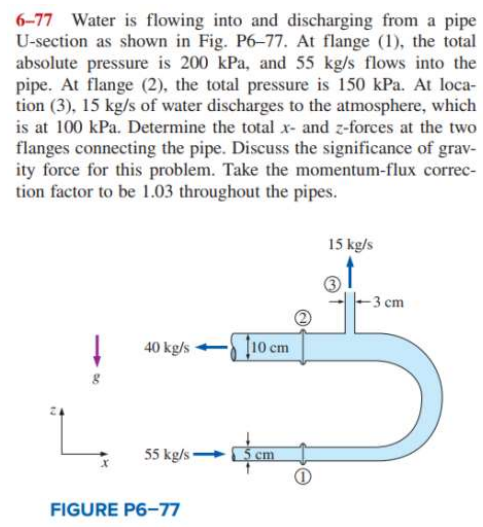
## Solution:
Given the water flow and discharge from a pipe U-section, the total x- and z- forces at the two flanges connecting the pipe are to be determined.

## Assumptions:


In [28]:
%%render param
P_1 = 200*u.kPa #absolute pressure at flange 1
M_in = 55*(u.kg/u.s) #water flow ito flange 1
P_2 = 150*u.kPa #absolute pressure at flange 2
M_out3 = 15*(u.kg/u.s) #water flow out of flange 3 into atmosphere
P_atm = 100*u.kPa #atmospheric pressure
M_out2 = 40*(u.kg/u.s) #water flow out of flange 2
beta = 1.03 #momentum flux correction factor
g = 9.81*(u.m/u.s**2)
rho = 1000*(u.kg/u.m**3)
D_3 = 3*u.cm #flange 3 diameter
D_2 = 10*u.cm #flange 2 diameter
D_1 = 5*u.cm #flange 1 diameter
pi = math.pi

<IPython.core.display.Latex object>

## Analysis:
Following the example 6-2 on the book, first the velocities at the 3 flanges must be found

$V = \dfrac{M}{\rho A}$

To be able to compute the velocities, the areas are to be found first

In [16]:
%%render
A_1 = (pi*(D_1**2))/4
A_2 = (pi*(D_2**2))/4
A_3 = (pi*(D_3**2))/4

<IPython.core.display.Latex object>

Compute the flow velocities at the three flanges: 
\begin{equation*}
V = \dfrac{\dot{m}}{\rho A}
\end{equation*}

In [17]:
%%render
V_1 = M_in/(rho*A_1)
V_2 = M_out2/(rho*A_2)
V_3 = M_out3/(rho*A_3)

<IPython.core.display.Latex object>

Because we already have the pressures at the three flanges we now can use the momentum equation for steady flow to get two equations for the forces in the x- and z- direction, $\Sigma \vec{F} = \Sigma_{out} \beta \dot{m}\vec{V} - \Sigma_{in} \beta \dot{m}\vec{V}$

- For the x-direction the momentum equation is:
$F_{Rx} + P_{1}A_{1} + P_{2}A_{2} = \beta \dot{m}_{2}(-V_{2}) - \beta \dot{m}_{1}V_{1}$, when isolating $F_{Rx}$ the equation becomes $F_{Rx} = -P_{1}A_{1} - P_{2}A_{2} - \beta(\dot{m}_{2}V_{2} + \dot{m}_{1}V_{1})$

- For the z-direction the momentum equation is:
$F_{Rz} + 0 = \dot{m}_{3}V_{3} - 0$, when isolation for $F_{Rz}$ the equation becomes $F_{Rz} = \beta \dot{m}_{3}V_{3}$

In [21]:
%%render
F_Rx = -((P_1-P_atm)*A_1)-((P_2-P_atm)*A_2) -(beta*((M_out2*V_2)+(M_in*V_1)))

<IPython.core.display.Latex object>

In [22]:
print(F_Rx.to('N'))

-2385.716944123874 newton


In [25]:
%%render
F_Rz = beta*M_out3*V_3

<IPython.core.display.Latex object>

In [26]:
print(F_Rz.to('N'))

327.85918276930437 newton


## Discussion:
To find the forces in the x- and z- direction the velocity for the flow in the three flanges was found and used in the momentum equation for steady flow, which was used to calculate $F_{Rx}$ and $F_{Rz}$. The force in the x-direction has a magnitude of 2385.7 N and acts in the opposite way of the assumed direction, and the force in the z-direction has a magnitude of 327.9 N and acts in the way it was assumed.